## **Project Overview**
This project focuses on performing Exploratory Data Analysis (EDA) and data preprocessing on the Titanic dataset. The primary objective is to understand the dataset, clean the data, and prepare it for further analysis or predictive modeling. The key steps in the project include:
- Data Loading and Inspection
- Exploratory Data Analysis (EDA)
- Data Cleaning
- Feature Engineering
- Visualization


In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns   
import warnings 
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
data=pd.read_csv("titanic.csv") 
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## EDA

In [4]:
# Descriptive Statistics
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Cleaning

In [5]:
# Checking missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Handling missing values
data["Age"].fillna(data["Age"].median(), inplace=True)
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)
data.drop(columns=["Cabin"], inplace=True)

In [7]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Feature Engineering

In [8]:
# Encoding Categorical variables
data_encoded = data.copy()
data_encoded["Sex"] = data_encoded["Sex"].map({"male": 0, "female": 1})
data_encoded["Embarked"] = data_encoded["Embarked"].map({"S": 0, "C": 1, "Q": 2})

In [9]:
# Dropping non-numeric columns
data_encoded = data_encoded.drop(columns=["Name", "Ticket", "PassengerId"]) 
data_encoded

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,28.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


### Correlation Matrix

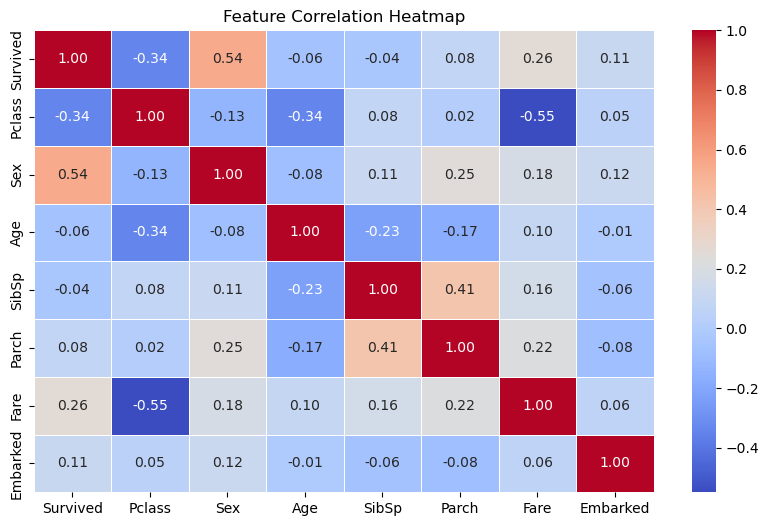

In [10]:
correlation_matrix = data_encoded.corr() 
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

## Data Visualization

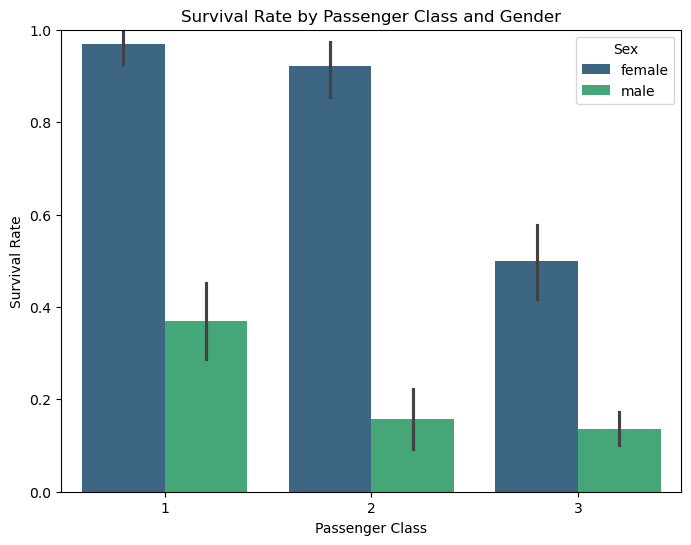

In [11]:
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x="Pclass", y="Survived", hue="Sex", palette="viridis")
plt.title("Survival Rate by Passenger Class and Gender")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)
plt.show()


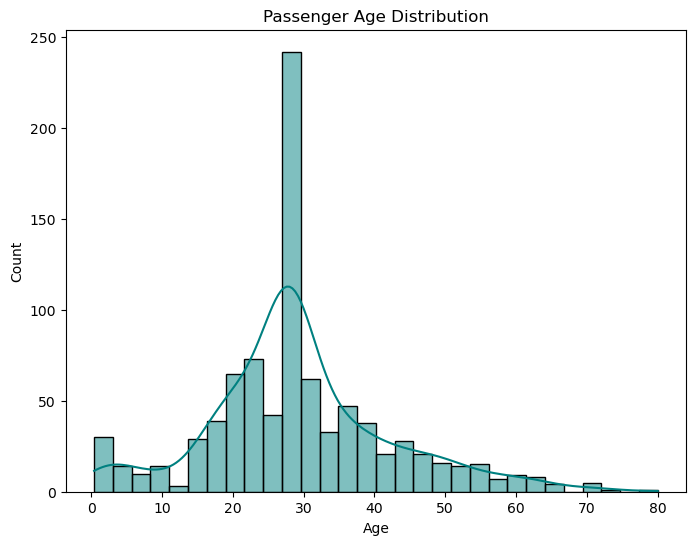

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(data["Age"], bins=30, kde=True, color="teal")
plt.title("Passenger Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

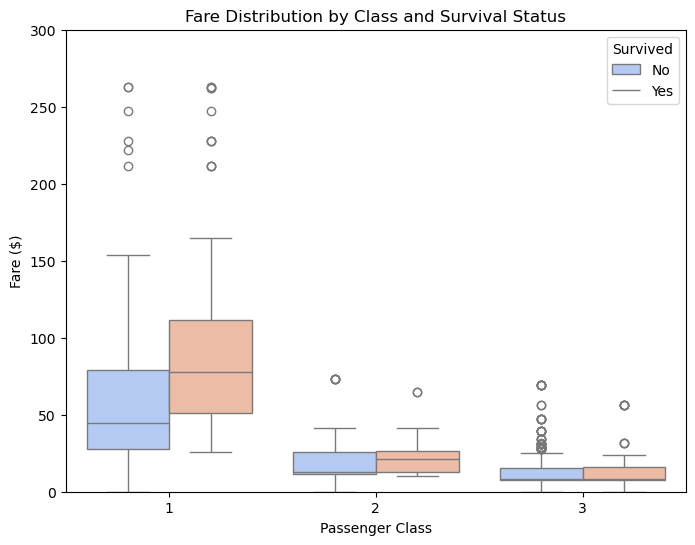

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="Pclass", y="Fare", hue="Survived", palette="coolwarm")
plt.title("Fare Distribution by Class and Survival Status")
plt.xlabel("Passenger Class")
plt.ylabel("Fare ($)") 
plt.ylim(0, 300) 
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


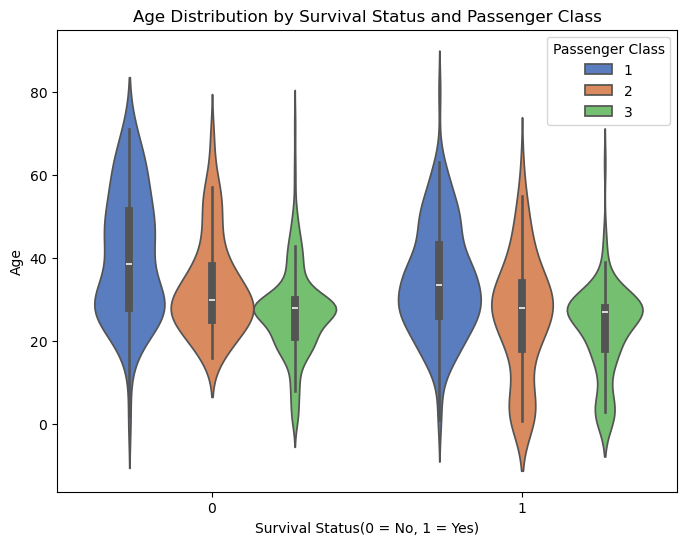

In [14]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x="Survived", y="Age", hue="Pclass", palette="muted")
plt.title("Age Distribution by Survival Status and Passenger Class")
plt.xlabel("Survival Status(0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.legend(title="Passenger Class")
plt.show()

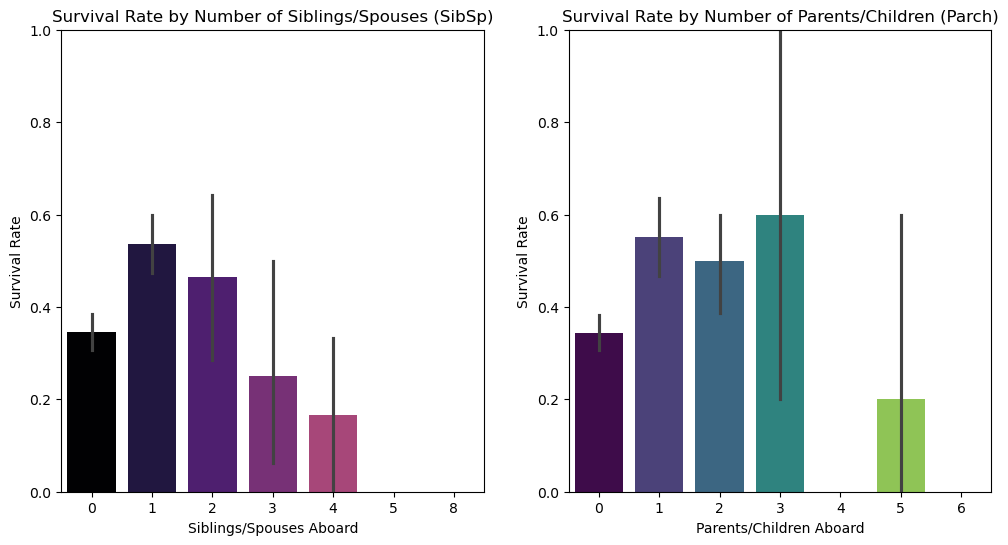

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=data, x="SibSp", y="Survived",hue="SibSp",legend=False, palette="magma")
plt.title("Survival Rate by Number of Siblings/Spouses (SibSp)")
plt.xlabel("Siblings/Spouses Aboard")
plt.ylabel("Survival Rate") 
plt.ylim(0, 1)


plt.subplot(1, 2, 2)
sns.barplot(data=data, x="Parch", y="Survived",hue="Parch",legend=False, palette="viridis")
plt.title("Survival Rate by Number of Parents/Children (Parch)")
plt.xlabel("Parents/Children Aboard")
plt.ylabel("Survival Rate")
plt.ylim(0, 1)

plt.show()

## **Conclusion**
The EDA and preprocessing steps conducted in this project provide valuable insights into the Titanic dataset. The handling of missing values, feature encoding, and correlation analysis help refine the dataset for Future work that could involve applying machine learning algorithms, hyperparameter tuning, and model evaluation to assess the predictive power of the cleaned dataset.